# 1 Introducción

El siguiente ejemplo modifica el color de una imagen parametrizada dependiendo de los parametros de entrada, estos parametros estan dados por tres barras deslizantes que marca la intensidad de los colores Rojo(**R**), Verde(**G**) y Azul(**B**).[1]

Cada Pixel esta formado por tres canales y cada uno de estos canales esta formado por los colores antes mencionados.[2]

<center>$ Pixel=CanalRojo*(param\_rojo,0,0)+CanalVerde*(0,param\_verde,0)+CanalAzul*(0,0,param\_azul)$</center>

---
# 2 Armado del ambiente
Toma la dirección web de una imagen con acceso público en internet, la deja disponible al contexto de ejecución del cuaderno Colab.

In [4]:
#@title ## 2.1 Parámetros de ejecución
#@markdown ---
#@markdown ### Especifique la URL de la imagen:
url_imagen = "https://raw.githubusercontent.com/kuczerawy/EA2/main/colores.jpg" #@param {type:"string"}

# TODO: Mejorar información y resultado de ejecución. 
!wget {url_imagen} -O imagen.jpg

--2020-11-28 18:22:35--  https://raw.githubusercontent.com/kuczerawy/EA2/main/colores.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66257 (65K) [image/jpeg]
Saving to: ‘imagen.jpg’

imagen.jpg          100%[===================>]  64.70K  --.-KB/s    in 0.009s  

2020-11-28 18:22:35 (7.32 MB/s) - ‘imagen.jpg’ saved [66257/66257]



# 3 Desarrollo

Imagen del filtro: imagen.jpg -RGB- [1186, 1920]
Tiempo de conversión de imagen: 55433.64 [ms]
Tiempo Total: 55599.551 [ms]


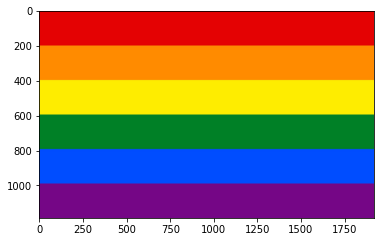

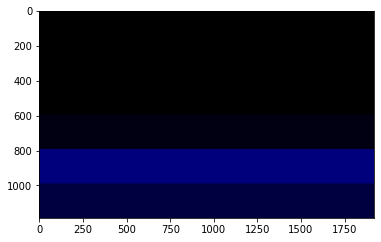

In [5]:
#@title 3.1 Parámetros de ejecución de CPU: { vertical-output: true }
#@markdown ### Mueve las barras deslizables para establecer cuanto influencia ese color en la imagen:

try:

  rojo = 1 #@param {type:"slider", min:0, max:1, step:0.001}
  verde = 1 #@param {type:"slider", min:0, max:1, step:0.001}
  azul = 0.999 #@param {type:"slider", min:0, max:1, step:0.001}

  %matplotlib inline
  from datetime import datetime

  tiempo_total = datetime.now()

  import  matplotlib.pyplot as plt
  import numpy
  from PIL import Image 

  # --------------------------------------------
  # Definición de función que transforma el tiempo en  milisegundos 
  tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
  # --------------------------------------------


  img_nombre = 'imagen.jpg'
  image = Image.open( img_nombre ) 
    
  # Optengo las proporsiones de la imagen. 
  img_alto, img_ancho = image.size 

  # Convierto la imagen comprimida en JPEG/PNG a array.
  img_pic_cpu = numpy.asarray(image)

  # Genero el array resultado (3 pixeles usa RGB * (el tamaño del array)).
  img_picR_cpu = numpy.empty_like( img_pic_cpu)

  # Muestro los atributos de la imagen y como se ve antes del seudo filtro.
  print("Imagen del filtro: " + img_nombre + " -" + image.mode + "- [" + str(img_ancho) + ", " + str(img_alto ) + "]" )  

  #muestro la imagen original
  plt.figure()
  imgplot=plt.imshow( img_pic_cpu )

  tiempo_img = datetime.now()

  # Convierto la imagen dependiendo los parametros
  for y  in range( 0, img_alto ):
    for x in range( 0, img_ancho ):
      pixel_R, pixel_G, pixel_B = img_pic_cpu[x][y]

      
      canal_rojo = (pixel_R*rojo)+(pixel_G*0)+(pixel_B*0)
      canal_verde = (pixel_R*0)+(pixel_G*verde)+(pixel_B*0)
      canal_azul = (pixel_R*0)+(pixel_G*0)+(pixel_B*azul)
      
      img_picR_cpu[x][y] = [canal_rojo, canal_verde, canal_azul]

  tiempo_img = datetime.now() - tiempo_img

  # Muestro la imagen luego de aplicarle el filtro.
  plt.figure()
  imgplot = plt.imshow( img_picR_cpu )

  tiempo_total = datetime.now() - tiempo_total

  print( "Tiempo de conversión de imagen:", tiempo_en_ms( tiempo_img   ), "[ms]" )
  print( "Tiempo Total:",                   tiempo_en_ms( tiempo_total ), "[ms]" )
except FileNotFoundError as err:
  print("No se encuentra cargada la imágen. Por favor ejecuta el armado del ambiente.")
  print(err)
except Exception as err:
  print("Ocurrió un error inesperado")
  print(err)

---
# 4 Tabla de pasos de ejecución del programa


 Procesador | Función | Detalle
------------|---------|----------
CPU      |  wget url_imagen       | Lectura de la dirección URL de la imagen (jpg) a procesar.
CPU      |  @param                | Lectura de los parametros ingresados.
CPU      |  import                | Importa los módulos para funcionar.
CPU      |  datetime.now()        | Toma el tiempo actual.
CPU      |  Image.open()          | Abre el archivo de la imagen.
CPU      |  numpy.asarray(imagen) | Convierte el formato comprimido JPG a RAW.
CPU      |  numpy.empty_like(()   | Genera el array destino, que tendrá a la imagen resultado. 
CPU      |  print()               | Informa los atributos de la imagen.
CPU      |  plt.imshow            | Muestra la imagen original.
CPU      |  Bucles anidados       | Convierte la imagen de acuerdo a los parametros ingresados.
CPU      |  plt.imshow            | Muestra la imagen resultado.

---
# 5 Conclusiones

El procesamiento de una imágen es muy costoso ya que tiene que trabajar en dos dimensiones (alto y ancho). 
Una imágen de tamaño 800*600 (que es relativamente de baja resolucion ya que hay imágenes de 2560*1024) tiene que procesar 480.000 pixeles.

Al trabajar con procesamiento secuencial (**CPU**) se debe trabajar con bucles anidados para cubrir las dos dimensiones de la imágen por lo que la complejidad computaciónal es de tipo cuadrática por lo que los tiempos de respuestas son muy elevados. El tiempo de respuesta depende del tamaño de la imagén, un pequeño incremento en el tamaño de la imagén incrementa considerablemente el tiempo de respuesta.



Cuando se trabaja con procesamiento paralelo (**CPU-GPU**) cada hilo ejecutado accede y modifica directamente un pixel de la imágen y al trabajar estos hilos de forma concurrente se eliminan los bucles anidados reduciendo así la complejidad computacional obteniendo muy buenos tiempos de respuestas incluso para imagenes con alta resolución.

---
# 6 Bibliografía


[1] Procesamiento de imagenes: [PDF](http://www2.elo.utfsm.cl/~elo328/pdf1dpp/PDI13_Color_1dpp.pdf)

[2] Canales de imagen digital: [Wiki](https://es.wikipedia.org/wiki/Canal_(imagen_digital) 